### DATA PT14-extra - Proyecto final - Grupo 3
#### Control de calidad de los datos del archivo Yelp business

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
business = pd.read_pickle(r'C:\Users\gonza\OneDrive\Desktop\Proyecto Grupal Henry\Yelp\business.pkl')

business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Revisamos columnas
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [4]:
# Revisamos Shape
business.shape

(150346, 28)

In [5]:
# Paso 1: Identificar columnas duplicadas por nombre
cols = business.columns
duplicated_cols = cols[cols.duplicated()].unique()

# Paso 2: Crear un nuevo DataFrame combinando los datos de las columnas duplicadas
for col in duplicated_cols:
    # Seleccionamos todas las columnas con ese nombre (ej: todas las 'name')
    same_cols = business.loc[:, business.columns == col]
    
    # Combinamos: si la primera tiene NaN, usa el valor de la otra
    business[col] = same_cols.bfill(axis=1).iloc[:, 0]

# Paso 3: Eliminar las columnas duplicadas (con el mismo nombre repetido)
business = business.loc[:, ~business.columns.duplicated()]

In [6]:
business.shape

(150346, 14)

In [7]:
# Eliminamos columnas que no serán utilizadas
business = business.drop(columns=["is_open", "attributes",  "hours"])

business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7.0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15.0,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22.0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13.0,"Brewpubs, Breweries, Food"


In [8]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150343 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  float64
 10  categories    150243 non-null  object 
dtypes: float64(4), object(7)
memory usage: 13.8+ MB


En el archivo con datos de Yelp se observan 150.346 filas. Se eliminarons las columnas "is_open", "attributes",  "hours" que no se usaran. Hay 103 filas que tiene valor nulo en categoria. Estos se descartaran cuando seleccionemos por categoria. Seleccionaremos los locales donde se venden pizza del estado de CA y NV.

In [11]:
# Buscamos NaN en columna 'state'
business['state'].isna().sum()

np.int64(0)

In [10]:
business = business[business['state'].notna()]


In [12]:
# Buscamos NaN en columna 'business_id'
business['business_id'].isna().sum()

np.int64(0)

In [13]:
# Guardar como Parquet (más eficiente) y obtener su tamaño
#business.to_parquet(r"C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PF\PF_google_yelp\datasets\business.parquet")
#print("Peso del Parquet:", os.path.getsize(r"C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PF\PF_google_yelp\datasets\business.parquet") / (1024 * 1024), "MB")

business.to_parquet(r'C:\Users\gonza\OneDrive\Desktop\Proyecto Grupal Henry\Yelp\business.parquet' , engine='fastparquet')

In [14]:
unique_categories = pd.DataFrame(business['categories'].unique())

In [15]:
print(unique_categories)

                                                       0
0      Restaurants, Food, Bubble Tea, Coffee & Tea, B...
1                              Brewpubs, Breweries, Food
2      Burgers, Fast Food, Sandwiches, Food, Ice Crea...
3      Sporting Goods, Fashion, Shoe Stores, Shopping...
4                    Synagogues, Religious Organizations
...                                                  ...
83154  Restaurants, Comfort Food, Food, Food Trucks, ...
83155  Pets, Nurseries & Gardening, Pet Stores, Hobby...
83156  Shopping, Jewelry, Piercing, Toy Stores, Beaut...
83157  Fitness/Exercise Equipment, Eyewear & Optician...
83158  Beauty & Spas, Permanent Makeup, Piercing, Tattoo

[83159 rows x 1 columns]


In [16]:
unique_resto = unique_categories[unique_categories[0].str.lower().str.contains("restaurant", na=False)]

In [17]:
# print(unique_resto)
print(unique_resto[0].to_string())

0        Restaurants, Food, Bubble Tea, Coffee & Tea, B...
2        Burgers, Fast Food, Sandwiches, Food, Ice Crea...
5        Pubs, Restaurants, Italian, Bars, American (Tr...
6        Ice Cream & Frozen Yogurt, Fast Food, Burgers,...
8               Vietnamese, Food, Restaurants, Food Trucks
9        American (Traditional), Restaurants, Diners, B...
11             Food, Delis, Italian, Bakeries, Restaurants
12                       Sushi Bars, Restaurants, Japanese
16                                     Korean, Restaurants
17       Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...
19                  Steakhouses, Asian Fusion, Restaurants
20                                    Restaurants, Italian
21                                   Hot Dogs, Restaurants
24                          Restaurants, Japanese, Seafood
25       Cocktail Bars, Bars, Italian, Nightlife, Resta...
26           Pizza, Chicken Wings, Sandwiches, Restaurants
28                         Pizza, Restaurants, Salad, So

In [18]:
unique_pizza = unique_categories[unique_categories[0].str.lower().str.contains("pizza", na=False)]

In [19]:
print(unique_pizza[0].to_string())

26           Pizza, Chicken Wings, Sandwiches, Restaurants
28                         Pizza, Restaurants, Salad, Soup
30                                      Pizza, Restaurants
38       Restaurants, Specialty Food, Steakhouses, Food...
55                                      Restaurants, Pizza
177          Restaurants, Sandwiches, Pizza, Chicken Wings
193      Arts & Entertainment, Nightlife, Jazz & Blues,...
211      Bars, Lounges, Nightlife, Pizza, Restaurants, ...
217      Sports Bars, Bars, Nightlife, Italian, Restaur...
235        Pizza, Restaurants, Bars, Nightlife, Sandwiches
244             Italian, Chicken Wings, Pizza, Restaurants
262      Italian, Pizza, Gluten-Free, Restaurants, Bars...
288      Ethnic Food, Specialty Food, Restaurants, Food...
308          Chicken Wings, Sandwiches, Restaurants, Pizza
322                            Mexican, Pizza, Restaurants
326      Pizza, Fast Food, Gluten-Free, Restaurants, Salad
362      Restaurants, Italian, Nightlife, Southern, Bar.

In [21]:
# selecciono los locales que venden pizza. Para los estados de CA y NV.
# Remember: The & and | operators require both sides of the condition to be in parentheses when used in pandas filtering.
# Your best bet is to use .isin(), as it is more readable and efficient:
yelp_pizza_CANV = business[
    business['categories'].str.lower().str.contains("pizza", na=False) &
    business['state'].isin(['CA', 'NV'])
]

In [22]:
yelp_pizza_CANV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 635 entries, 29 to 150172
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   635 non-null    object 
 1   name          635 non-null    object 
 2   address       635 non-null    object 
 3   city          635 non-null    object 
 4   state         635 non-null    object 
 5   postal_code   635 non-null    object 
 6   latitude      635 non-null    float64
 7   longitude     635 non-null    float64
 8   stars         635 non-null    float64
 9   review_count  635 non-null    float64
 10  categories    635 non-null    object 
dtypes: float64(4), object(7)
memory usage: 59.5+ KB


In [24]:
yelp_pizza_CANV['state'].unique()

array(['CA', 'NV'], dtype=object)

En el dataframe business con datos de Yelp hay 635 locales donde se vende pizza. Son del estado de California y Nevada. 

In [25]:
yelp_pizza_CANV.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
29,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,37188,36.464747,-86.659187,3.5,8.0,"Pizza, Chicken Wings, Sandwiches, Restaurants"
676,qma1sGQv7ArUtzuUTQElRg,Katie's Pizza & Pasta Osteria,14171 Clayton Rd,Town and Country,NV,63017,38.624680,-90.515066,4.0,313.0,"Pasta Shops, Bars, Nightlife, Specialty Food, ..."
989,5cz1XbgalpQ89gsNQwneVQ,Portofino's Italian Kitchen,6742 Memorial Hwy,Tampa,NV,33615,27.995596,-82.582862,4.0,59.0,"Restaurants, Pizza, Italian"
1548,902y4z16-TKyS9UcThCGYA,MRCKA's Dojo Pizza,4601 Morganford Rd,Saint Louis,CA,63116,38.584834,-90.266358,4.0,10.0,"Italian, Restaurants, Pizza"
1717,T57pARC36apZzr3CSCs4-w,Surf and Turf Kitchen,"2400 Street Rd, Ste 69",Lahaska,NV,18938,40.347589,-75.029855,3.5,25.0,"Pizza, Seafood, Restaurants, American (Traditi..."


Reviso duplicados. Y Outliers en las columnas stars y review_count

In [26]:
# reviso duplicados
df_dup = yelp_pizza_CANV[yelp_pizza_CANV.duplicated(subset=['business_id'], keep=False)]
df_dup = df_dup.sort_values(['business_id'])

print(df_dup)

Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, categories]
Index: []


No hay datos duplicados de pizzerias

min,  1.0
max,  5.0
mean,  3.374015748031496


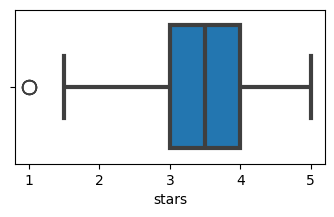

In [27]:
plt.figure(figsize=(4, 2))
sns.boxplot(x = 'stars', data = yelp_pizza_CANV,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation

# reviso valor maximo y minimo. Creo que estan en el rango correcto
print('min, ', yelp_pizza_CANV['stars'].min())
print('max, ', yelp_pizza_CANV['stars'].max())
print('mean, ', yelp_pizza_CANV['stars'].mean())

El rango de Stars (calificaciones en Yelp) es entre 1.0 y 5.0. El valor promedio es de 3.4

<Axes: xlabel='review_count'>

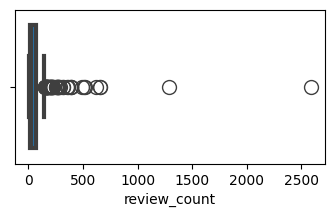

In [28]:
# reviso outliers en cantidad de reviews
plt.figure(figsize=(4, 2))
sns.boxplot(x = 'review_count', data = yelp_pizza_CANV,
            fliersize = 10, # Outlier size
            linewidth = 3,  # Lines width
            saturation = 0.95) # Fill color saturation

In [29]:
print(yelp_pizza_CANV[['review_count']].describe())

       review_count
count    635.000000
mean      63.645669
std      138.224143
min        5.000000
25%       14.000000
50%       28.000000
75%       67.000000
max     2588.000000


El 75% de locales tiene 67 reviews o menos. Hay un local con 2588 reviews. Reviso los que tienen mas de 300 reviews

In [30]:
yelp_pizza_CANV[yelp_pizza_CANV['review_count'] > 300]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories
676,qma1sGQv7ArUtzuUTQElRg,Katie's Pizza & Pasta Osteria,14171 Clayton Rd,Town and Country,NV,63017,38.624680,-90.515066,4.0,313.0,"Pasta Shops, Bars, Nightlife, Specialty Food, ..."
6106,wHiPhPVuGnngEieDBMG00g,Mellow Mushroom - Brandon,10959 Causeway Blvd,Brandon,NV,33511,27.922260,-82.328670,4.0,391.0,"Bars, Pizza, Sandwiches, Nightlife, Restaurants"
24180,U158K3VPSN8ZFlJ1rlR4FA,Arpeggio,1101 N Bethlehem Pke,Spring House,NV,19477,40.187039,-75.228079,4.0,394.0,"Seafood, Pizza, Restaurants, Greek, Mediterran..."
24780,NhXS2YbDi3N1IrIl0bcnpg,Bazbeaux Pizza,333 Massachusetts Ave,Indianapolis,CA,46204,39.771667,-86.153371,4.0,652.0,"Nightlife, Restaurants, Pizza, Bars, Local Flavor"
26266,xlMQBBt9wrtahdqiRDcVSg,The Stillery,113 2nd Ave N,Nashville,NV,37201,36.162249,-86.775712,4.5,2588.0,"American (New), Restaurants, Pubs, Beer, Wine ..."
66615,pUZtLtnoNmXsfdji4ms0Pg,Pizanos Pizza,"95 N Sierra St, Ste 102",Reno,NV,89501,39.525234,-119.814506,4.0,389.0,"Restaurants, Chicken Wings, Pizza, Sandwiches,..."
75680,eS3gRY_8yxWiGzMZIdgz-A,Brick & Brew,26 W State St,Media,NV,19063,39.917967,-75.390538,4.0,366.0,"American (New), Bars, Pizza, Gastropubs, Whisk..."
80220,gltppHhVxJN9ETmQM6BFxg,MOD Pizza,"4945 S Virginia St, Suite A",Reno,NV,89502,39.480501,-119.791314,4.5,313.0,"Pizza, Fast Food, Restaurants"
80269,JjmmSW_QQh2Db4fuIEMATA,Persona Pizzeria,905 State St,Santa Barbara,NV,93101,34.420609,-119.700953,4.0,624.0,"Food, Italian, Pizza, Fast Food, Gelato, Chick..."
92686,FD7gMovIYQmhdn23Iq91zQ,Lorenzo & Sons Pizza,305 S St,Philadelphia,CA,19147,39.941596,-75.147810,4.0,657.0,"Pizza, Italian, Restaurants"


In [31]:
# Eliminamos columnas que no serán utilizadas
yelp_pizza_CANV = yelp_pizza_CANV.drop(columns=["categories"])

In [33]:
# guardo el archivo en formato parquet
yelp_pizza_CANV.to_parquet(r'C:\Users\gonza\OneDrive\Desktop\Proyecto Grupal Henry\Yelp\yelp_pizza_CANV.parquet' , engine='fastparquet')